## **Supervised Learning Project**

### Fraud Detection in Electricity and Gas Consumption


### **Project Overview**
This project focuses on developing a supervised machine learning model to detect fraudulent activities in electricity and gas consumption. It is a classification to identify clients involved in fraudulent manipulations of meters. The type of learning employed is supervised learning, as the model will be trained on labeled data indicating fraudulent and non-fraudulent activities.

### **Project Goals**
The goal of this project is to reduce financial losses suffered by the Tunisian Company of Electricity and Gas (STEG) due to meter tampering by consumers. By accurately detecting fraud, which could enhance the company's revenue and ensure fair billing practices. This initiative not only serves an economic purpose but also promotes ethical consumer behavior.


## **Data Source and Description**
The dataset for this project is obtained from the official [STEG website](https://www.steg.com.tn/en/institutionnel/mission.html) and the [Zindi platform](https://zindi.africa/competitions/fraud-detection-in-electricity-and-gas-consumption-challenge). It encompasses two main tabulated datasets: **client data** (client) and **billing history** (invoice), covering the period from 2005 to 2019.


1. **Client Data**
   - **Client_id**: Unique identifier for each client.
   - **District**: Geographic district of the client.
   - **Client_catg**: Category of the client.
   - **Region**: Area where the client is located.
   - **Creation_date**: Date when the client account was created.
   - **Target**: Indicates fraud (1) or not fraud (0).


2. **Invoice Data**
   - **Client_id**: Unique identifier for each client.
   - **Invoice_date**: Date when the invoice was issued.
   - **Tarif_type**: Type of tariff applied.
   - **Counter_number**, **Counter_statue**, **Counter_code**, **Reading_remarque**, **Counter_coefficient**: Various meter-related information.
   - **Consommation_level_1** to **Consommation_level_4**: Different levels of consumption.
   - **Old_index**, **New_index**: Meter reading indices.
   - **Months_number**: Number of months covered by the invoice.
   - **Counter_type**: Type of counter used.


- Categorical: client_id, district, client_catg, region, target

- Numerical: tarif_type, counter_coefficient, consommation_level, old_index, new_index


---

## **EDA and Data Preprocessing, Cleaning**

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

# import module m_eda_plots as edap
import m_eda_plots as edap

client_path = 'data/client_train.csv'
invoice_path = 'data/invoice_train.csv'


In [6]:
client = pd.read_csv(client_path)
invoice = pd.read_csv(invoice_path)

client_size = os.path.getsize(client_path)
invoice_size = os.path.getsize(invoice_path)

print(f'Data client has {client.shape[0]} rows and {client.shape[1]} columns')
print(f'Data invoice has {invoice.shape[0]} rows and {invoice.shape[1]} columns')

print(f'Data client has {client_size} bytes')
print(f'Data invoice has {invoice_size} bytes')

Data client has 135493 rows and 6 columns
Data invoice has 4476749 rows and 16 columns
Data client has 5986133 bytes
Data invoice has 344347830 bytes


## **Client Data**

In [7]:
# show first 5 rows
client.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [8]:
# sort the order of columns
fs = ['client_id', 'creation_date', 'disrict', 'region', 'client_catg', 'target']
client = client[fs]

In [9]:
# show info about data
client.info()

# There is no missing values in client data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   client_id      135493 non-null  object 
 1   creation_date  135493 non-null  object 
 2   disrict        135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   client_catg    135493 non-null  int64  
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [10]:
# inspect how many unique values in each column
for col in client.columns:
    print(f'"{col}" has {client[col].nunique()} contents: {client[col].unique()}')
    print('')

"client_id" has 135493 contents: ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']

"creation_date" has 8088 contents: ['31/12/1994' '29/05/2002' '13/03/1986' ... '16/08/2004' '30/08/1978'
 '25/05/1978']

"disrict" has 4 contents: [60 69 62 63]

"region" has 25 contents: [101 107 301 105 303 103 309 311 304 104 312 305 306 308 372 307 313 310
 371 302 106 379 399 206 199]

"client_catg" has 3 contents: [11 12 51]

"target" has 2 contents: [0. 1.]



### **creation_date**

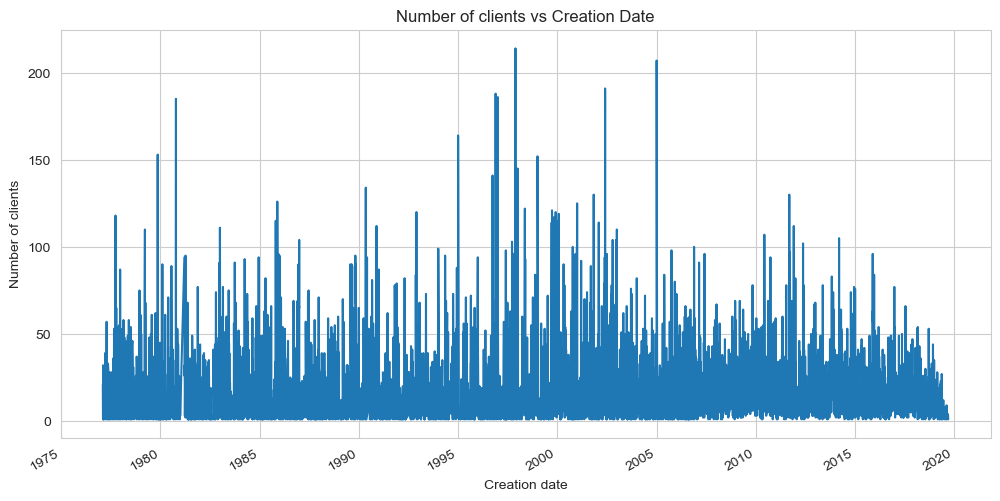

In [11]:
# transform data type of creation_date column to datetime
client['creation_date'] = pd.to_datetime(client['creation_date'])

# plot number of clients vs creation date
client.groupby('creation_date').size().plot(figsize=(12, 6))
plt.title('Number of clients vs Creation Date')
plt.xlabel('Creation date')
plt.ylabel('Number of clients')
plt.show()

### **district**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target      0.0   1.0   ratio_0   ratio_1
district                                 
60        30777  1145  0.964131  0.035869
62        38270  2083  0.948381  0.051619
63        27096  1891  0.934764  0.065236
69        31784  2447  0.928515  0.071485



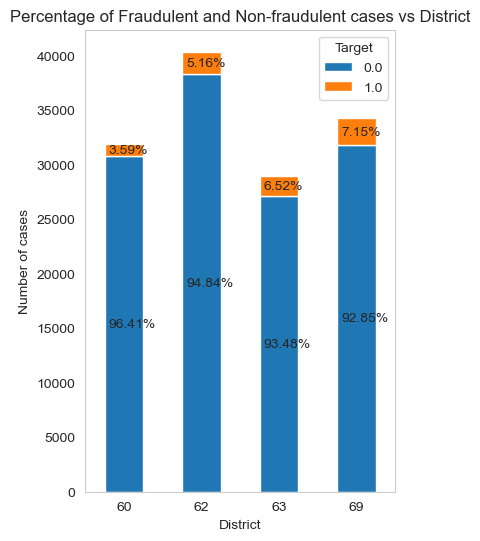

The highest rate of fraudulent is district = 69 with rate 7.15%
The second highest rate of fraudulent is tarif_type = 63 with rate 6.52%
The third highest rate of fraudulent is tarif_type = 62 with rate 5.16%


In [12]:
# rename column disrict to district
client.rename(columns={'disrict': 'district'}, inplace=True)

# plot distribution of target variable vs district
# here number of cases means number of clients
edap.feature_target_distribution(client, 'district', 'target')


### **client_catg**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target          0.0   1.0   ratio_0   ratio_1
client_catg                                  
11           124303  7191  0.945313  0.054687
12             2229    92  0.960362  0.039638
51             1395   283  0.831347  0.168653



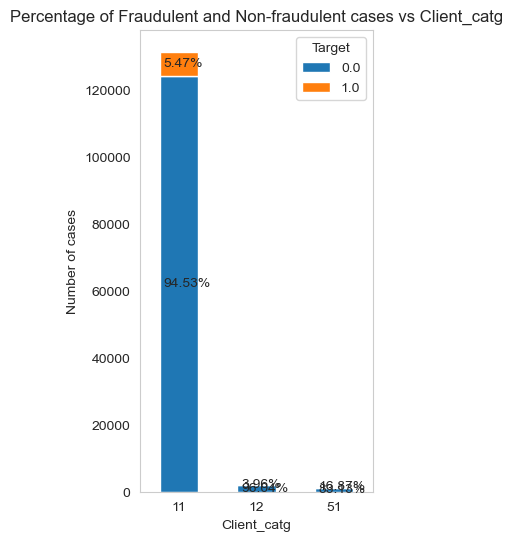

The highest rate of fraudulent is client_catg = 51 with rate 16.87%
The second highest rate of fraudulent is tarif_type = 11 with rate 5.47%
The third highest rate of fraudulent is tarif_type = 12 with rate 3.96%
Most of the clients are client_catg = 11


In [13]:
# plot distribution of target variable vs client_catg
# here number of cases means number of clients
edap.feature_target_distribution(client, 'client_catg', 'target')

print('Most of the clients are client_catg = 11')


### **region**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target    0.0   1.0   ratio_0   ratio_1
region                                 
101     32557  1213  0.964081  0.035919
103      8041   923  0.897033  0.102967
104     12145   720  0.944034  0.055966
105      1553    92  0.944073  0.055927
106       653    53  0.924929  0.075071
107      9340   658  0.934187  0.065813
199         2     0  1.000000  0.000000
206        52     1  0.981132  0.018868
301      9229   315  0.966995  0.033005
302      4045   266  0.938297  0.061703
303      5656   326  0.945503  0.054497
304      3572   256  0.933124  0.066876
305      2559   157  0.942194  0.057806
306      5750   294  0.951357  0.048643
307      3166   210  0.937796  0.062204
308       780    61  0.927467  0.072533
309      3511   158  0.956936  0.043064
310      4604   247  0.949083  0.050917
311     11408   998  0.919555  0.080445
312      4161   218  0.950217  0.049783
313      1929   

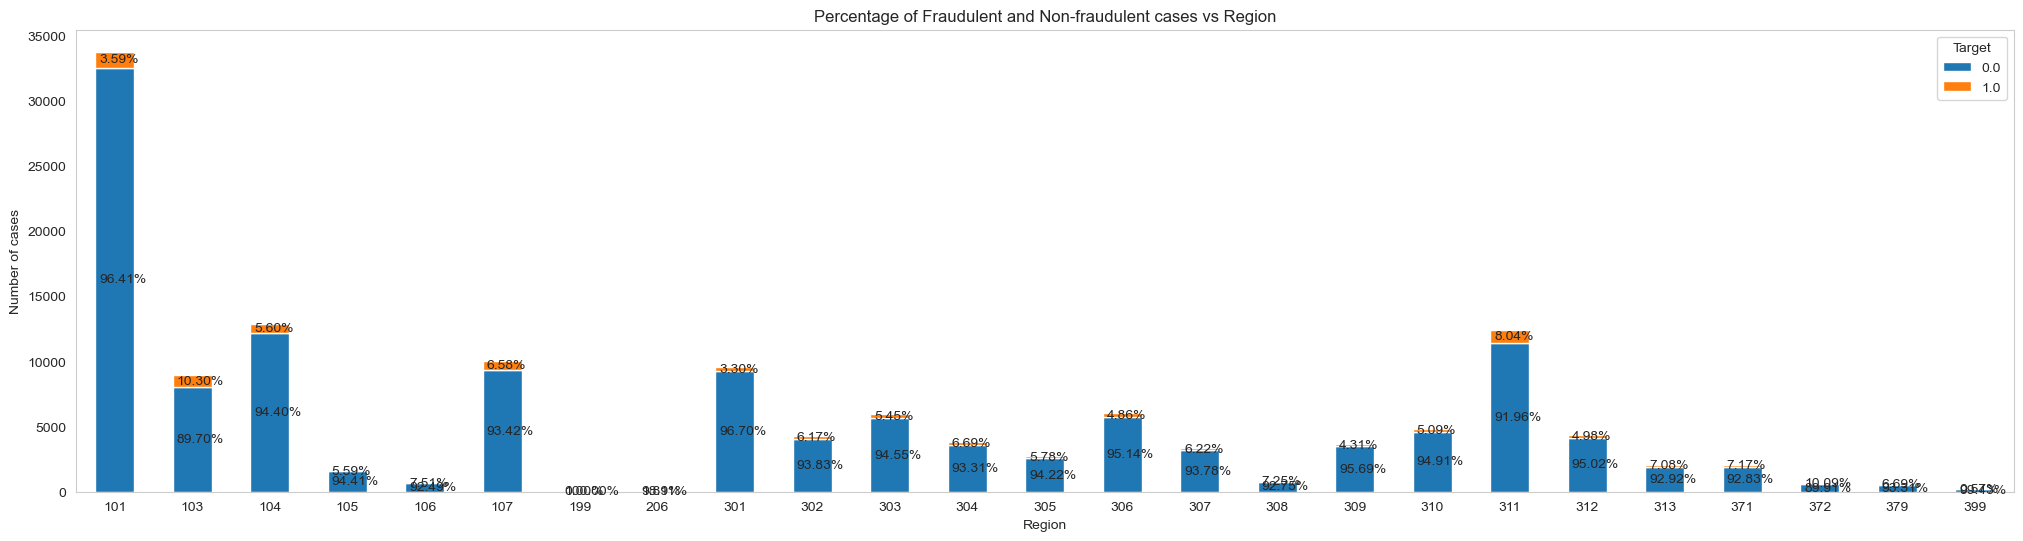

The highest rate of fraudulent is region = 103 with rate 10.30%
The second highest rate of fraudulent is tarif_type = 372 with rate 10.09%
The third highest rate of fraudulent is tarif_type = 311 with rate 8.04%
Most of the clients are from region = 101 , 104 and 311


In [14]:
# plot distribution of target variable vs region
# here number of cases means number of clients
edap.feature_target_distribution(client, 'region', 'target')

print('Most of the clients are from region = 101 , 104 and 311')

### **target**

target
0.0    127927
1.0      7566
Name: count, dtype: int64

Target has 5.58 % of 1, which is detected as fraud.
This is a highly imbalanced dataset.


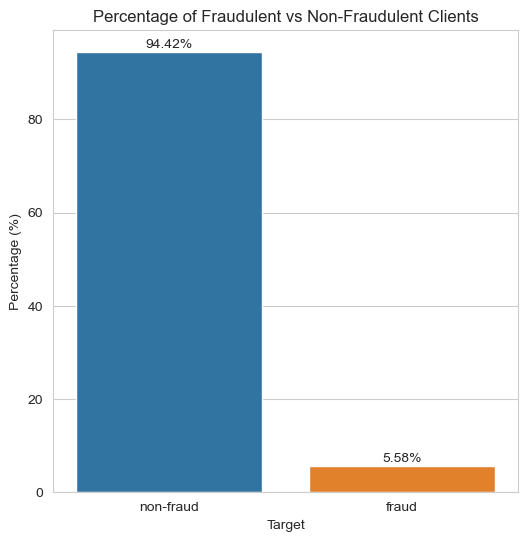

In [15]:
# plot the percentage of the fraudulent and non-fraudulent clients
edap.fraud_ratio(client)

target
0.0    127927
1.0      7566
Name: count, dtype: int64

Target has 5.58 % of 1, which is detected as fraud.
This is a highly imbalanced dataset.


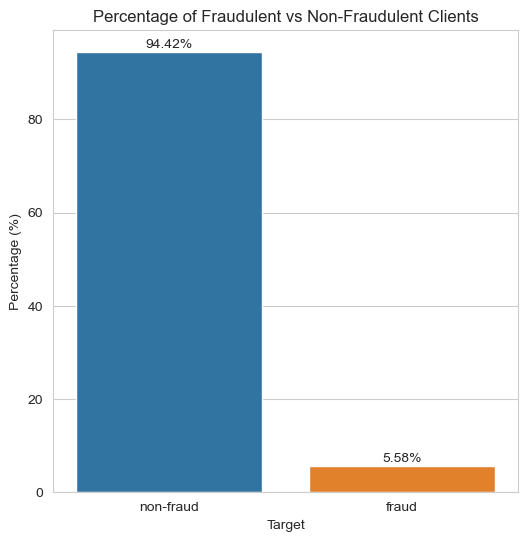

In [16]:
# show the counts of fraudulent and non-fraudulent clients
print(client.target.value_counts())
print('')

# calculate the percentage of the fraudulent clients
fraud_rate = client.target.mean() * 100
non_fraud_rate = 100 - fraud_rate

print(f'Target has {fraud_rate:.2f} % of 1, which is detected as fraud.')
print('This is a highly imbalanced dataset.')

# plot the percentage of the fraudulent and non-fraudulent clients
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=['non-fraud', 'fraud'], y=[non_fraud_rate, fraud_rate])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')


plt.title('Percentage of Fraudulent vs Non-Fraudulent Clients')
plt.xlabel('Target')
plt.ylabel('Percentage (%)')
plt.show()

In [17]:
#edap.fraud_ratio(client)


## **Invoice Data**

In [18]:
# show first 5 rows
invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [19]:
# show info about data
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [20]:
# check if there is any missing values
invoice.isna().sum()

# There is no missing values in invoice data

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [21]:
# inspect how many unique values in each column
for col in invoice.columns:
    print(f'"{col}" has {invoice[col].nunique()} contents: {invoice[col].unique()}')
    print('')

"client_id" has 135493 contents: ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']

"invoice_date" has 8275 contents: ['2014-03-24' '2013-03-29' '2015-03-23' ... '1995-11-28' '1982-07-04'
 '1996-09-02']

"tarif_type" has 17 contents: [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]

"counter_number" has 201893 contents: [1335667  678902  572765 ... 4811719  262195  560948]

"counter_statue" has 16 contents: [0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]

"counter_code" has 42 contents: [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]

"reading_remarque" has 8 contents: [  8   6   9   7 207 413 203   5]

"counter_coefficient" has 16 contents: [ 1  3  0 10  4 33 50 20  2  6 40  9 30  5 11  8]

"consommation_level_1" has 8295 contents: [   82  1200   123 ... 43053  4824  8314]

"conso

## **df** - merged dataframe of client and invoice data

In [22]:
# merge client and invoice data
df = pd.merge(client, invoice, on='client_id', how='left')
df.shape

(4476749, 21)

### **invoice_date**

In [23]:
# transform data type of invoice_date column to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])


<Axes: xlabel='invoice_date'>

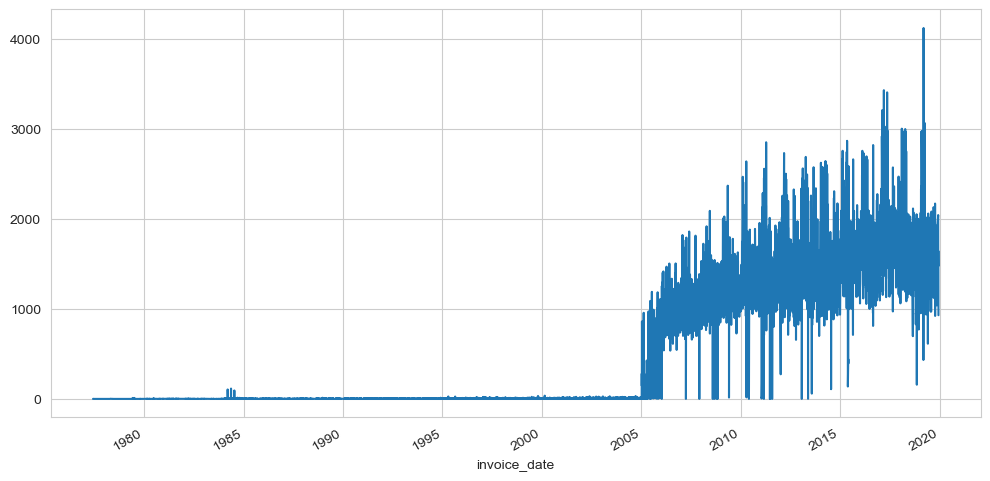

In [24]:
# plot distribution of all invoice cases vs invoice_date
df.groupby('invoice_date').size().plot(figsize=(12, 6))

# This dataset should include the data from 2005 to 2019, therefore I would delete the data before 2005.

In [25]:
# make sure that these data are non-fraudulent
df.query('invoice_date < "2005-01-01" and target == 1').shape
# There is no fraudulent cases before 2005-01-01, so I will remove these data

(0, 21)

In [26]:
# count the number of invoices issued before 2005
pre_2005 = len(df[df['invoice_date'] < '2005-01-01'])
print(f'{pre_2005} invoices were issued before 2005-01-01 and will be removed.')


22112 invoices were issued before 2005-01-01 and will be removed.


In [27]:
# number of clients before removing the data before 2005
df.client_id.nunique()

135493

After removing the data before 2005, there are 128364 clients left.


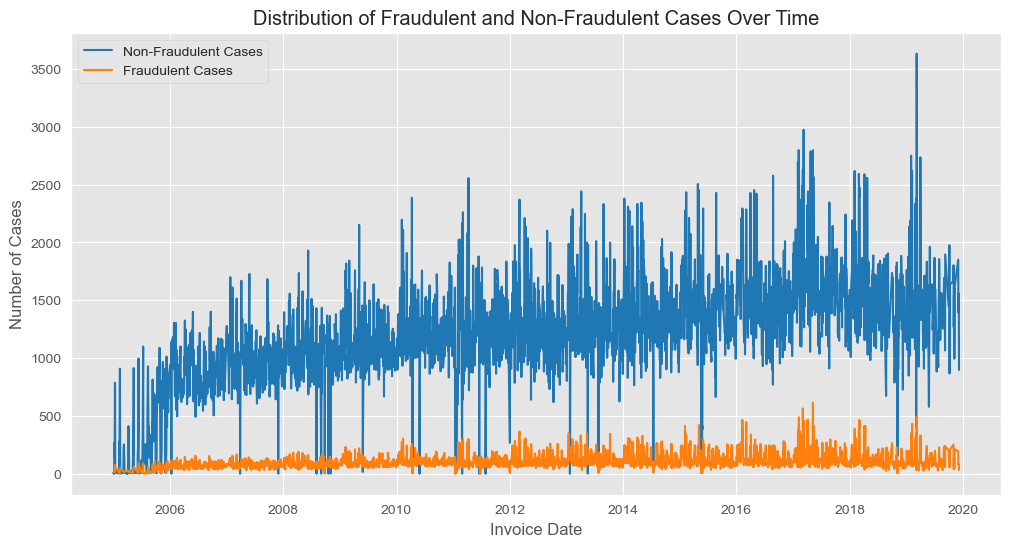

In [28]:
# remove the data before 2005
df = df[df['invoice_date'] >= '2005-01-01']

# number of clients after removing the data before 2005
print(f'After removing the data before 2005, there are {df.client_id.nunique()} clients left.')

# calculate the fraudulent cases for each invoice_date
fraud_cases = df[df['target'] == 1].groupby('invoice_date').size()
non_fraud_cases = df[df['target'] == 0].groupby('invoice_date').size()

# set the style of the plot
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=plt.cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']))

# plot the fraudulent and non-fraudulent cases over time
plt.figure(figsize=(12, 6))
plt.plot(non_fraud_cases, label='Non-Fraudulent Cases')
plt.plot(fraud_cases, label='Fraudulent Cases')

plt.legend()
plt.title('Distribution of Fraudulent and Non-Fraudulent Cases Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Cases')
plt.show()


In [29]:
# inspect the cases with invoice_date before creation_date
fraud_cases = df.query('invoice_date < creation_date and target == 1').shape[0]
non_fraud = df.query('invoice_date < creation_date and target == 0').shape[0]
ratio = fraud_cases / (non_fraud+fraud_cases)
print(f'There are {fraud_cases} cases with invoice_date before creation_date.')
print(f'There are {non_fraud} non-fraudulent cases with invoice_date before creation_date.')
print(f'The ratio of fraudulent cases to non-fraudulent cases is {ratio:.2%}')

There are 941 cases with invoice_date before creation_date.
There are 12676 non-fraudulent cases with invoice_date before creation_date.
The ratio of fraudulent cases to non-fraudulent cases is 6.91%


### **numerical features, outliers**
use quartiles (Q1, Q3) and the interquartile range (IQR) to calculate the range of outliers (lower_bound, upper_bound).

In [33]:
# calculate the lower and upper bounds to detect the outliers
# and the ratio of fraudulent cases in the outliers

def outlier_detection(df, features):
    
    print(df[features].describe().T)
    print('')

    outliers_list = []
    outliers_bound = []

    for feature in num_fs:
        
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_bound.append({'feature': feature, 'lower_bound': lower_bound, 'upper_bound': upper_bound})

        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers_list.append(feature_outliers)

    outliers_bound_df = pd.DataFrame(outliers_bound)
    outliers = pd.concat(outliers_list).drop_duplicates()

    a = len(outliers[outliers['target'] == 1])
    b = len(outliers[outliers['target'] == 0])
    c = a / b * 100 if b != 0 else float('inf') 

    print('Bounds of outliers:')
    print(outliers_bound_df)
    print('')
    print(f'There are {a} fraudulent cases and {b} non-fraudulent cases in the outliers.')
    print(f'The ratio of fraudulent cases in the outliers is {c:.2f} %' if b != 0 else 'Infinitely many fraudulent cases since there are no non-fraudulent cases.')
    
    return outliers


In [34]:
# examine outliers for part of the numerical features
num_fs = ['consommation_level_1', 'old_index', 'new_index']
outl_1 = outlier_detection(df, num_fs)
outl_1.shape

# Given that the goal of this project is to detect fraudulent cases, 
# I will not remove these outliers at the current stage due to the significant proportion (11.96 %) of fraudulent cases.

                          count          mean           std  min     25%  \
consommation_level_1  4454637.0    410.163334    742.211711  0.0    80.0   
old_index             4454637.0  17808.335873  40442.523723  0.0  1796.0   
new_index             4454637.0  18391.293582  41031.585564  0.0  2061.0   

                         50%      75%        max  
consommation_level_1   275.0    601.0   999910.0  
old_index             7713.0  21715.0  2800280.0  
new_index             8215.0  22401.0  2870972.0  

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_1       -701.5       1382.5
1             old_index     -28082.5      51593.5
2             new_index     -28449.0      52911.0

There are 39188 fraudulent cases and 327632 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 11.96 %


(366820, 23)

In [35]:
# examine outliers for the sub-dataframe with consommation_level_2 != 0
sub_df_2 = df[df['consommation_level_2'] != 0]
outl_2 = outlier_detection(sub_df_2, 'consommation_level_2')
outl_2.shape

# I will also not remove these outliers with high fraudulent rate 15.11 % for now.

count    658964.000000
mean        741.580255
std        3102.525961
min           1.000000
25%         141.000000
50%         370.000000
75%         540.000000
max      999073.000000
Name: consommation_level_2, dtype: float64

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_1      -1050.0       2550.0
1             old_index     -44353.5     107042.5
2             new_index     -43353.5     109386.5

There are 7292 fraudulent cases and 48255 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 15.11 %


(55547, 23)

In [36]:
# examine outliers for the sub-dataframe with consommation_level_3 != 0
sub_df_3 = df[df['consommation_level_3'] != 0]
outl_3 = outlier_detection(sub_df_3, 'consommation_level_3')
outl_3.shape

# not remove the outliers with high fraudulent rate 13.76 % for the same reason.

count    183358.000000
mean        495.782993
std         607.730952
min           1.000000
25%         200.000000
50%         399.000000
75%         800.000000
max       64492.000000
Name: consommation_level_3, dtype: float64

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_1     -200.000     1400.000
1             old_index   -72616.625   162854.375
2             new_index   -70632.125   165546.875

There are 4169 fraudulent cases and 30292 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 13.76 %


(34461, 23)

In [37]:
# examine outliers for the sub-dataframe with consommation_level_4 != 0
sub_df_4 = df[df['consommation_level_4'] != 0]
outl_4 = outlier_detection(sub_df_4, 'consommation_level_4')
outl_4.shape

# not remove the outliers, rate 12.97 %, same reason.

count     92958.000000
mean       2548.848792
std        5527.208035
min           1.000000
25%         433.000000
50%        1147.000000
75%        2753.000000
max      547946.000000
Name: consommation_level_4, dtype: float64

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_1      -700.00      1700.00
1             old_index   -130304.00    279350.00
2             new_index   -129093.25    285646.75

There are 1234 fraudulent cases and 9516 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 12.97 %


(10750, 23)

### **consommation_level, outliers**

In [38]:
# use Z-score to detect outliers
from scipy import stats

def z_score_outlier_detection(df, features):
        
        outliers_list = []
        outliers_bound = []
    
        for feature in features:
            
            z = np.abs(stats.zscore(df[feature]))
            outliers_bound.append({'feature': feature, 'lower_bound': -3, 'upper_bound': 3})
    
            feature_outliers = df[z > 3]
            outliers_list.append(feature_outliers)
    
        outliers_bound_df = pd.DataFrame(outliers_bound)
        outliers = pd.concat(outliers_list).drop_duplicates()
    
        a = len(outliers[outliers['target'] == 1])
        b = len(outliers[outliers['target'] == 0])
        c = (a / b) * 100 if b != 0 else float('inf') 
    
        print('Bounds of outliers:')
        print(outliers_bound_df)
        print('')
        print(f'There are {a} fraudulent cases and {b} non-fraudulent cases in the outliers.')
        print(f'The ratio of fraudulent cases in the outliers is {c:.2f} %' if b != 0 else 'Infinitely many fraudulent cases since there are no non-fraudulent cases.')
        
        return outliers

In [39]:
outl = z_score_outlier_detection(df, num_fs)

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_1           -3            3
1             old_index           -3            3
2             new_index           -3            3

There are 8922 fraudulent cases and 58211 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 15.33 %


In [40]:
outl1 = z_score_outlier_detection(sub_df_2, ['consommation_level_2'])

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_2           -3            3

There are 387 fraudulent cases and 3842 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 10.07 %


In [41]:
outl3 = z_score_outlier_detection(sub_df_3, ['consommation_level_3'])

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_3           -3            3

There are 227 fraudulent cases and 1368 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 16.59 %


In [42]:
outl4 = z_score_outlier_detection(sub_df_4, ['consommation_level_4'])

Bounds of outliers:
                feature  lower_bound  upper_bound
0  consommation_level_4           -3            3

There are 120 fraudulent cases and 1019 non-fraudulent cases in the outliers.
The ratio of fraudulent cases in the outliers is 11.78 %


<Axes: title={'center': 'Boxplots of consommation_level'}>

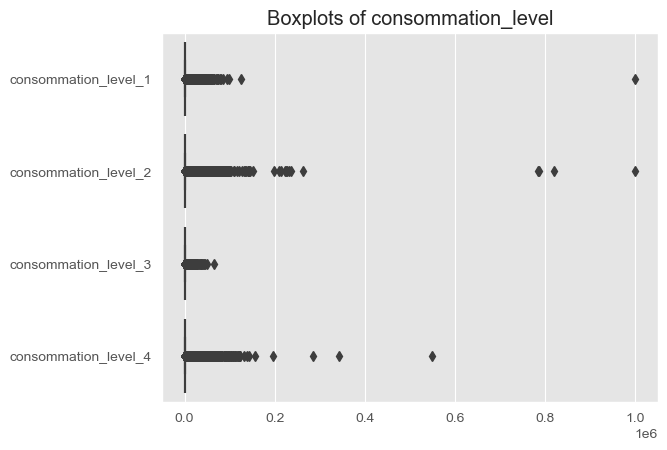

In [43]:
num_fs = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']

plt.title('Boxplots of consommation_level')
sns.boxplot(data=df[num_fs], orient='h')

In [44]:
def delete_outliers(df, features, threshold):
    
    for f in features:
        
        # calculate the number of the outliers with out of the threshold
        number_ou = df.query(f'{f} > {threshold}').shape[0]
        print(f'There are {number_ou} outliers in {f}')
        
        # check if there is any fraudulent case in the outliers
        number_fraud = df.query(f'{f} > {threshold} and target == 1').shape[0]
        print(f'There are {number_fraud} fraudulent cases in the outliers.')
        
        # delete the outliers
        df.drop(df[df[f] > threshold].index, inplace=True)
        print(f'The outliers in {f} have been deleted.')
        print(f'The shape of the dataframe is {df.shape}')
        print('')
        

In [45]:
df.query('consommation_level_2 > 150000').head()

,client_id,creation_date,district,region,client_catg,target,invoice_date,tarif_type,counter_number,counter_statue,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
223999,train_Client_106047,1977-09-27,60,101,11,0.0,2007-11-23,10,8538740,5,...,100,209952,0,0,27955,238007,2,ELEC,2007,11
502067,train_Client_113523,2009-07-31,60,101,11,0.0,2012-01-02,11,30367,0,...,1200,819886,0,0,183478,4564,4,ELEC,2012,1
564176,train_Client_115236,2006-02-17,60,101,51,0.0,2007-01-24,11,36001763,0,...,1200,236472,0,0,0,59418,4,ELEC,2007,1
1081143,train_Client_129382,2006-02-17,60,101,51,0.0,2007-09-20,11,36001760,0,...,1200,198432,0,0,90571,140479,4,ELEC,2007,9
1081145,train_Client_129382,2006-02-17,60,101,51,0.0,2007-01-24,11,36001760,0,...,1200,263760,0,0,0,66240,4,ELEC,2007,1


In [46]:
df.query('consommation_level_4 > 150000').head()

,client_id,creation_date,district,region,client_catg,target,invoice_date,tarif_type,counter_number,counter_statue,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
221432,train_Client_105976,2016-05-06,69,103,51,0.0,2018-02-11,11,2158700002177,0,...,800,400,800,284765,1942940,2229705,4,ELEC,2018,2
221446,train_Client_105976,2016-05-06,69,103,51,0.0,2016-02-06,11,2158700002177,0,...,400,200,400,343568,0,344568,2,ELEC,2016,2
527246,train_Client_114205,2001-03-13,60,101,11,0.0,2016-09-02,11,62191,0,...,2800,1400,2800,156944,16534,180478,14,ELEC,2016,9
820191,train_Client_122213,2019-02-27,69,103,11,0.0,2019-04-03,11,2178700010679,0,...,400,200,400,196352,0,197352,2,ELEC,2019,4
3479829,train_Client_72985,2017-04-28,63,312,51,0.0,2017-03-05,11,2168701765600,0,...,400,200,400,547946,0,548946,2,ELEC,2017,3


In [47]:
num_client = df.client_id.nunique()
new_num_client = df.query('consommation_level_1 < 150000 and consommation_level_2 < 150000 and consommation_level_3 < 150000 and consommation_level_4 < 150000').client_id.nunique()
print(f'The original number of clients is {num_client}')
print(f'New number of clients: {new_num_client}')
if new_num_client == num_client:
    print('The number of clients remains the same.')
else:
    print('The number of clients has changed.')

# I wouldn't affect the number of clients by deleting the outliers.

The original number of clients is 128364
New number of clients: 128364
The number of clients remains the same.


In [48]:
delete_outliers(df, num_fs, 150000)

There are 1 outliers in consommation_level_1
There are 0 fraudulent cases in the outliers.
The outliers in consommation_level_1 have been deleted.
The shape of the dataframe is (4454636, 23)

There are 14 outliers in consommation_level_2
There are 0 fraudulent cases in the outliers.
The outliers in consommation_level_2 have been deleted.
The shape of the dataframe is (4454622, 23)

There are 0 outliers in consommation_level_3
There are 0 fraudulent cases in the outliers.
The outliers in consommation_level_3 have been deleted.
The shape of the dataframe is (4454622, 23)

There are 5 outliers in consommation_level_4
There are 0 fraudulent cases in the outliers.
The outliers in consommation_level_4 have been deleted.
The shape of the dataframe is (4454617, 23)



In [49]:
# number of clients after removing the outliers
print(f'After removing the outliers, there are {df.client_id.nunique()} clients left.')

After removing the outliers, there are 128364 clients left.


<Axes: title={'center': 'Boxplots of consommation_level'}>

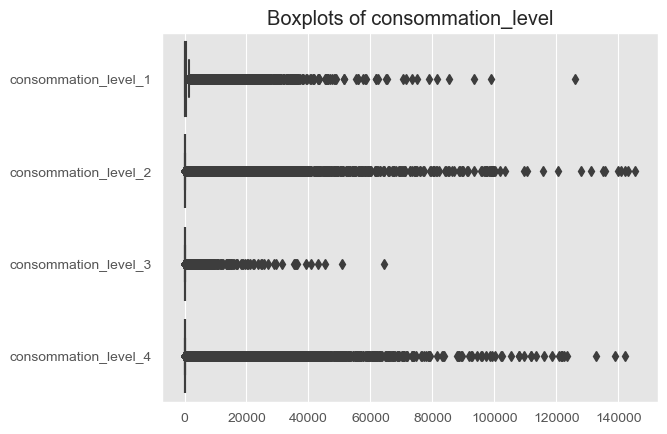

In [50]:
plt.title('Boxplots of consommation_level')
sns.boxplot(data=df[num_fs], orient='h')

### **months_number**

In [51]:
df.months_number.describe()

count    4.454617e+06
mean     4.478854e+01
std      3.131329e+03
min      0.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      6.366240e+05
Name: months_number, dtype: float64

count    4.101505e+06
mean     3.864665e+01
std      2.827084e+03
min      0.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      6.366240e+05
Name: months_number, dtype: float64

count    353112.000000
mean        116.128526
std        5554.834113
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max      447773.000000
Name: months_number, dtype: float64


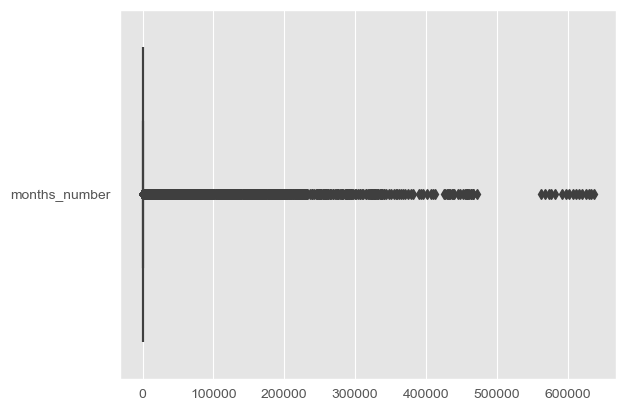

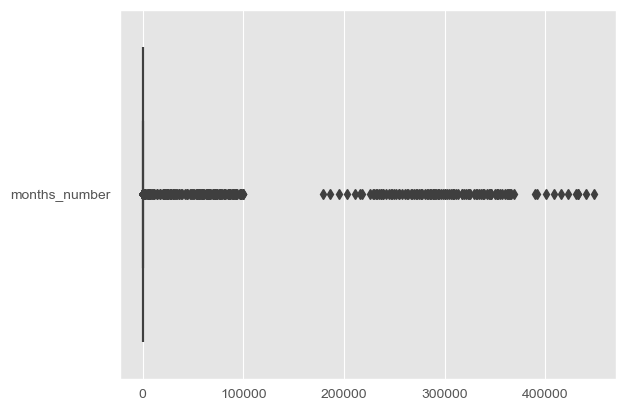

In [52]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

print(df_0.months_number.describe())
print('')
print(df_1.months_number.describe())

sns.boxplot(data=df_0[['months_number']], orient='h')
plt.show()
sns.boxplot(data=df_1[['months_number']], orient='h')
plt.show()

In [53]:
print(f'The original number of clients is {df.client_id.nunique()}')

new_df = df.query('months_number <= 500000')
print(f'New number of clients: {new_df.client_id.nunique()}')
# It wouldn't affect the number of clients if I drop the rows with months_number > 500000

The original number of clients is 128364
New number of clients: 128363


In [54]:
# delete the outliers with months_number > 500000
delete_outliers(df, ['months_number'], 500000)

There are 16 outliers in months_number
There are 0 fraudulent cases in the outliers.
The outliers in months_number have been deleted.
The shape of the dataframe is (4454601, 23)



### **counter_statue**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target              0.0     1.0   ratio_0   ratio_1
counter_statue                                     
0               3983841  342426  0.920850  0.079150
1                 67625    5340  0.926814  0.073186
2                    28       2  0.933333  0.066667
3                    94      19  0.831858  0.168142
4                  2013     230  0.897459  0.102541
5                 18202    2140  0.894799  0.105201
46                   14       0  1.000000  0.000000
420                   1       0  1.000000  0.000000
618                  12       0  1.000000  0.000000
769                   6       0  1.000000  0.000000
0                 29029    2869  0.910057  0.089943
1                   470      62  0.883459  0.116541
4                    17       5  0.772727  0.227273
5                   124      19  0.867133  0.132867
A                    13       0  1.000000  0.000000



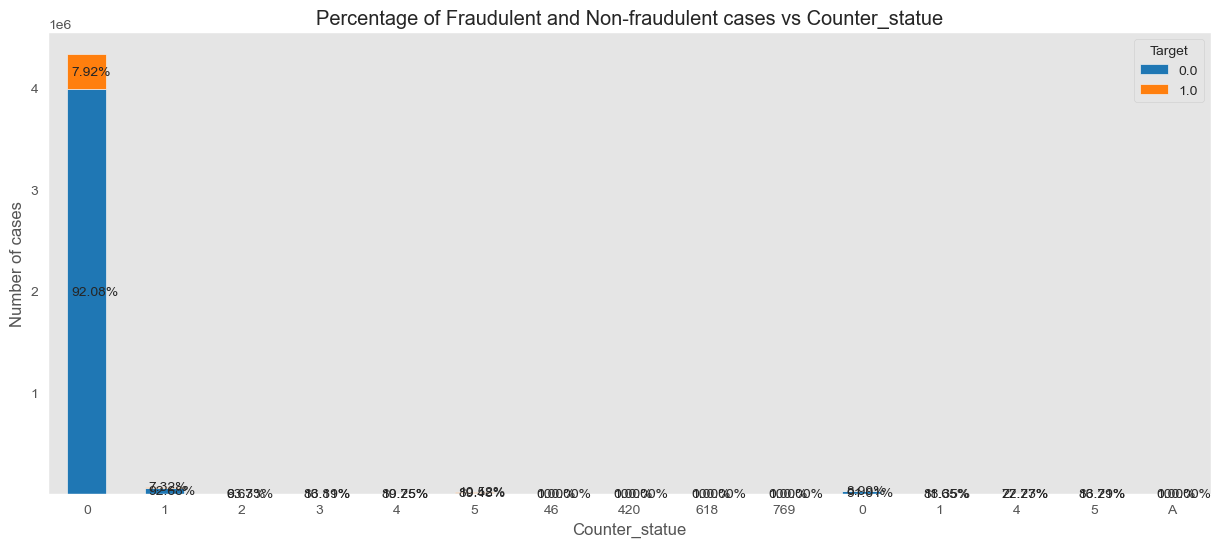

The highest rate of fraudulent is counter_statue = 4 with rate 22.73%
The second highest rate of fraudulent is tarif_type = 3 with rate 16.81%
The third highest rate of fraudulent is tarif_type = 5 with rate 13.29%


In [55]:
edap.feature_target_distribution(df, 'counter_statue', 'target')

In [56]:
# inspect the counts of each unique value in counter_statue column
df['counter_statue'].value_counts()

# This column contains diverse values, so we should do data cleaning

counter_statue
0      4326267
1        72965
0        31898
5        20342
4         2243
1          532
5          143
3          113
2           30
4           22
46          14
A           13
618         12
769          6
420          1
Name: count, dtype: int64

In [57]:
df.counter_statue.unique()

array([0, 1, 5, 4, 2, 3, 769, '0', '5', '1', '4', 'A', 618, 46, 420],
      dtype=object)

In [58]:
counter_uniq = [0, 1, 5, 4, 2, 3, 769, '0', '5', '1', '4', 'A', 618, 46, 420]

for c in counter_uniq:
    print(f'counter_statue = {c}: ')
    cases = df[df["counter_statue"] == c].shape[0]
    print(f'{cases} rows')
    number_fraud = number_fraud = len(df[(df['counter_statue'] == c) & (df['target'] == 1)])
    print(f'{number_fraud} fraudulent cases')
    rate = number_fraud / cases * 100 if cases != 0 else float('inf')
    print(f'{rate:.2f} % of fraudulent cases')
    print('')

# according to the results, no special suspect cases found, I think it's fine to combine some values

counter_statue = 0: 
4326267 rows
342426 fraudulent cases
7.92 % of fraudulent cases

counter_statue = 1: 
72965 rows
5340 fraudulent cases
7.32 % of fraudulent cases

counter_statue = 5: 
20342 rows
2140 fraudulent cases
10.52 % of fraudulent cases

counter_statue = 4: 
2243 rows
230 fraudulent cases
10.25 % of fraudulent cases

counter_statue = 2: 
30 rows
2 fraudulent cases
6.67 % of fraudulent cases

counter_statue = 3: 
113 rows
19 fraudulent cases
16.81 % of fraudulent cases

counter_statue = 769: 
6 rows
0 fraudulent cases
0.00 % of fraudulent cases

counter_statue = 0: 
31898 rows
2869 fraudulent cases
8.99 % of fraudulent cases

counter_statue = 5: 
143 rows
19 fraudulent cases
13.29 % of fraudulent cases

counter_statue = 1: 
532 rows
62 fraudulent cases
11.65 % of fraudulent cases

counter_statue = 4: 
22 rows
5 fraudulent cases
22.73 % of fraudulent cases

counter_statue = A: 
13 rows
0 fraudulent cases
0.00 % of fraudulent cases

counter_statue = 618: 
12 rows
0 fraudulent

In [59]:
# transform data type of counter_statue column to string
# combine integer and string values into string values ['0', '1', '2', '3', '4', '5']
df['counter_statue'] = df['counter_statue'].astype(str)
df['counter_statue'].value_counts()

counter_statue
0      4358165
1        73497
5        20485
4         2265
3          113
2           30
46          14
A           13
618         12
769          6
420          1
Name: count, dtype: int64

In [60]:
# combine all values except 0, 1, 2, 3, 4, 5 into 9
df.loc[~df['counter_statue'].isin(['0', '1', '2', '3', '4', '5']), 'counter_statue'] = '9'
df['counter_statue'].value_counts()

counter_statue
0    4358165
1      73497
5      20485
4       2265
3        113
9         46
2         30
Name: count, dtype: int64

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target              0.0     1.0   ratio_0   ratio_1
counter_statue                                     
0               4012870  345295  0.920771  0.079229
1                 68095    5402  0.926500  0.073500
2                    28       2  0.933333  0.066667
3                    94      19  0.831858  0.168142
4                  2030     235  0.896247  0.103753
5                 18326    2159  0.894606  0.105394
9                    46       0  1.000000  0.000000



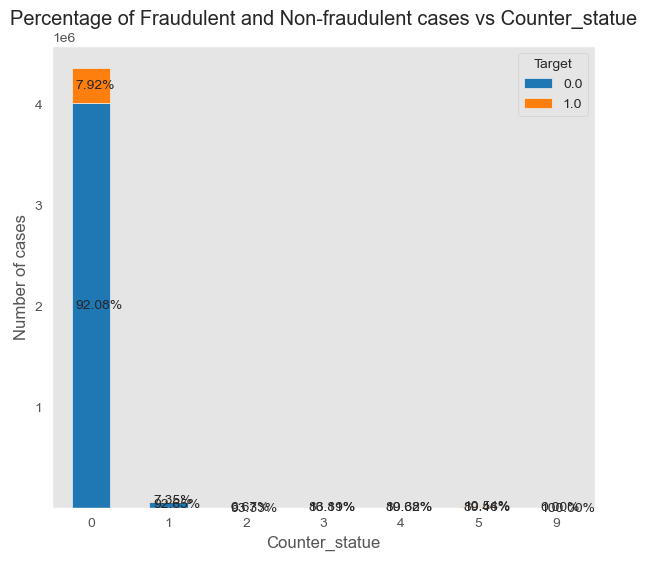

The highest rate of fraudulent is counter_statue = 3 with rate 16.81%
The second highest rate of fraudulent is tarif_type = 5 with rate 10.54%
The third highest rate of fraudulent is tarif_type = 4 with rate 10.38%
counter_statue = 0 has the most invoice cases


In [61]:
# plot distribution of target cases vs counter_statue
edap.feature_target_distribution(df, 'counter_statue', 'target')

print('counter_statue = 0 has the most invoice cases')


### **tarif_type**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target          0.0     1.0   ratio_0   ratio_1
tarif_type                                     
8                42       1  0.976744  0.023256
9              5595     444  0.926478  0.073522
10           247660   24605  0.909628  0.090372
11          2468670  197385  0.925964  0.074036
12            10081    1264  0.888585  0.111415
13            10208    1301  0.886958  0.113042
14            10161    1302  0.886417  0.113583
15            61867    8933  0.873828  0.126172
18                0       4  0.000000  1.000000
21               91      11  0.892157  0.107843
24                9       0  1.000000  0.000000
27                1       0  1.000000  0.000000
29             8745    1098  0.888449  0.111551
40          1264186  113422  0.917667  0.082333
42                1       0  1.000000  0.000000
45            14172    3342  0.809181  0.190819



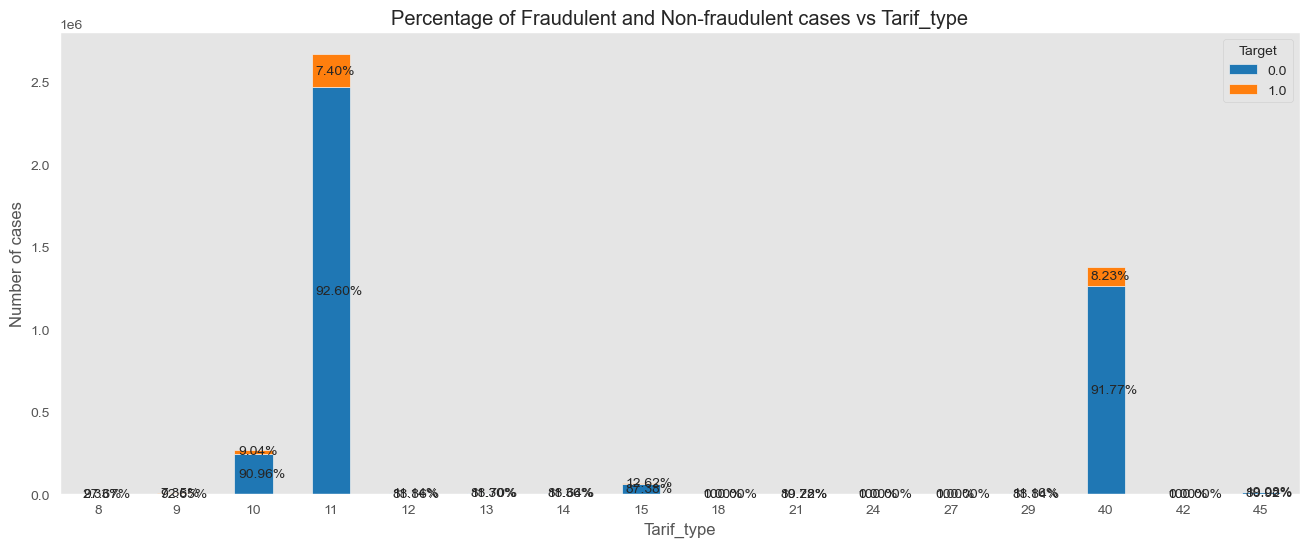

The highest rate of fraudulent is tarif_type = 18 with rate 100.00%
The second highest rate of fraudulent is tarif_type = 45 with rate 19.08%
The third highest rate of fraudulent is tarif_type = 15 with rate 12.62%


In [62]:
edap.feature_target_distribution(df, 'tarif_type', 'target')


#### **reading_remarque**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target                0.0     1.0   ratio_0   ratio_1
reading_remarque                                     
5                       1       0  1.000000  0.000000
6                 2039622  171938  0.922255  0.077745
7                       8       1  0.888889  0.111111
8                  759651   67769  0.918096  0.081904
9                 1302175  113404  0.919889  0.080111
203                    14       0  1.000000  0.000000
207                     6       0  1.000000  0.000000
413                    12       0  1.000000  0.000000



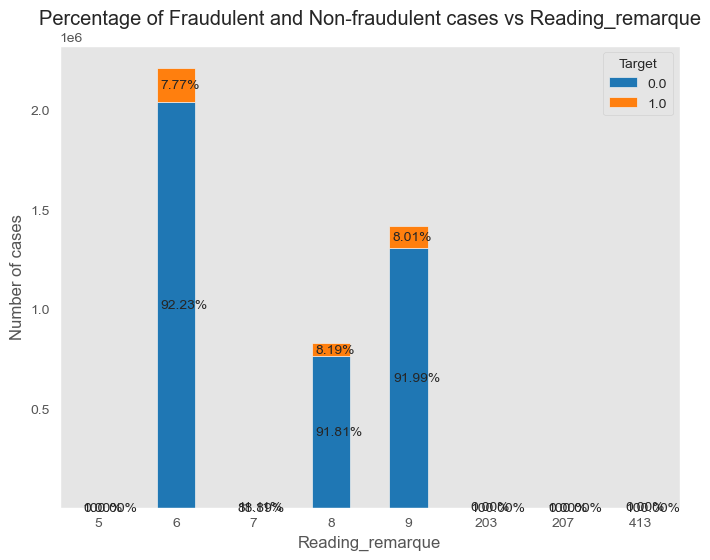

The highest rate of fraudulent is reading_remarque = 7 with rate 11.11%
The second highest rate of fraudulent is tarif_type = 8 with rate 8.19%
The third highest rate of fraudulent is tarif_type = 9 with rate 8.01%


In [63]:
edap.feature_target_distribution(df, 'reading_remarque', 'target')

In [64]:
# combine reading_remarque 203, 207, 413 to 5
df.loc[df['reading_remarque'].isin([203, 207, 413]), 'reading_remarque'] = 5
df['reading_remarque'].value_counts()

reading_remarque
6    2211560
9    1415579
8     827420
5         33
7          9
Name: count, dtype: int64

### **counter_coefficient**

observed the relationship from the data: 

counter_coefficient * (new_index - old_index) = consommation_level_1 + consommation_level_2 + consommation_level_3 + consommation_level_4

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target                   0.0     1.0   ratio_0   ratio_1
counter_coefficient                                     
0                         45       1  0.978261  0.021739
1                    4099875  353109  0.920703  0.079297
2                        875       0  1.000000  0.000000
3                        310       0  1.000000  0.000000
4                          9       0  1.000000  0.000000
5                          0       1  0.000000  1.000000
6                         29       0  1.000000  0.000000
8                          1       0  1.000000  0.000000
9                          3       0  1.000000  0.000000
10                         5       1  0.833333  0.166667
11                         1       0  1.000000  0.000000
20                         1       0  1.000000  0.000000
30                       137       0  1.000000  0.000000
33                         1       0  1.0

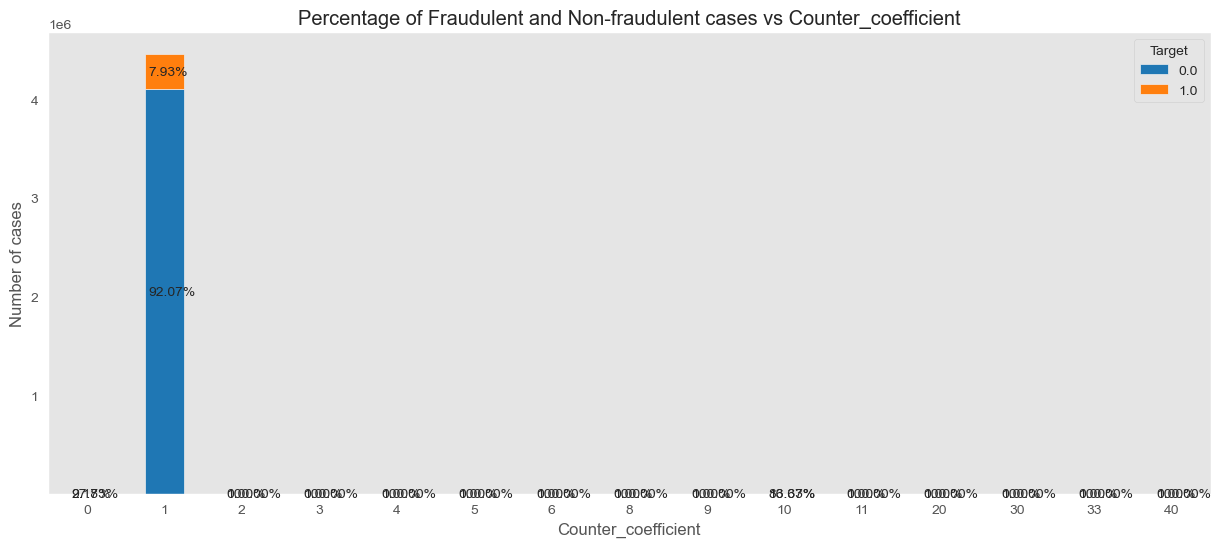

The highest rate of fraudulent is counter_coefficient = 5 with rate 100.00%
The second highest rate of fraudulent is tarif_type = 10 with rate 16.67%
The third highest rate of fraudulent is tarif_type = 1 with rate 7.93%


In [65]:
# plot distribution of target cases vs counter_coefficient
edap.feature_target_distribution(df, 'counter_coefficient', 'target')

In [66]:
# observe some cases
fs = ['client_id', 'invoice_date', 'counter_type', 'counter_coefficient', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'months_number', 'tarif_type', 'counter_code', 'target']
df.query('counter_coefficient == 1 and target == 1')[fs].sort_values(by=['client_id', 'invoice_date']).head(20)

,client_id,invoice_date,counter_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,tarif_type,counter_code,target
1392,train_Client_100032,2013-04-03,ELEC,1,303,0,0,0,0,303,4,11,203,1.0
1394,train_Client_100032,2013-06-25,ELEC,1,293,0,0,0,303,596,4,11,203,1.0
1393,train_Client_100032,2013-10-30,ELEC,1,403,0,0,0,596,999,4,11,203,1.0
1401,train_Client_100032,2014-03-03,ELEC,1,259,0,0,0,999,1258,4,11,203,1.0
1391,train_Client_100032,2014-04-11,ELEC,1,418,0,0,0,1579,1997,4,11,203,1.0
1396,train_Client_100032,2014-06-27,ELEC,1,321,0,0,0,1258,1579,4,11,203,1.0
1397,train_Client_100032,2015-02-03,ELEC,1,300,0,0,0,1997,2297,4,11,203,1.0
1398,train_Client_100032,2015-06-23,ELEC,1,329,0,0,0,2297,2626,4,11,203,1.0
1399,train_Client_100032,2015-10-28,ELEC,1,450,0,0,0,2626,3076,4,11,203,1.0
1400,train_Client_100032,2016-02-29,ELEC,1,386,0,0,0,3076,3462,4,11,203,1.0


In [67]:
# check those data which doesn't satisfy the relationship: 
# # counter_coefficient * (new_index - old_index) = consommation_level_1 + consommation_level_2 + consommation_level_3 + consommation_level_4
sub_df = df.query('counter_coefficient * (new_index - old_index) != consommation_level_1 + consommation_level_2 + consommation_level_3 + consommation_level_4')[fs].sort_values(by=['client_id', 'invoice_date'])
sub_df.shape

(17438, 14)

In [68]:
sub_df.head(20)

,client_id,invoice_date,counter_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,tarif_type,counter_code,target
1120,train_Client_100024,2014-06-20,ELEC,1,800,400,318,0,99260,778,4,11,207,0.0
1215,train_Client_100025,2012-02-17,ELEC,1,372,0,0,0,6952,7300,4,11,203,0.0
1865,train_Client_100050,2012-01-25,ELEC,1,2400,543,0,0,7709,7709,8,11,413,0.0
2632,train_Client_100075,2008-11-27,ELEC,1,116,0,0,0,0,0,14,11,410,0.0
2818,train_Client_10008,2015-05-01,ELEC,1,800,400,800,363,99486,1849,4,11,413,0.0
2865,train_Client_100080,2009-11-06,ELEC,1,5000,0,0,0,3143,3143,18,14,413,0.0
3004,train_Client_100083,2012-02-16,GAZ,1,204,0,0,0,1469,1469,12,40,5,1.0
5257,train_Client_100144,2012-06-04,ELEC,1,600,99398,0,0,19772,19770,2,11,207,0.0
5579,train_Client_100151,2012-06-02,ELEC,1,616,0,0,0,23853,24347,4,11,203,0.0
5751,train_Client_100157,2018-12-02,ELEC,1,800,400,800,4086,97099,3185,4,11,420,0.0


In [69]:
sub_df.query('target == 1').shape

(1509, 14)

In [70]:
rate = sub_df.query('target == 1').shape[0] / sub_df.shape[0] * 100 
print(f'The rate of fraudulent cases in these data is {rate:.2f} %')

# Given that there are fraudulent cases included in these data which doesn't satisfy the reasonable relationship, I still cannot delete them.

The rate of fraudulent cases in these data is 8.65 %


#### **counter_code**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target            0.0     1.0   ratio_0   ratio_1
counter_code                                     
0                  32       0  1.000000  0.000000
1                   1       0  1.000000  0.000000
5             1240157  109827  0.918646  0.081354
10              24029    3595  0.869860  0.130140
16                 71       2  0.972603  0.027397
25              12257    2649  0.822286  0.177714
40               1770     691  0.719220  0.280780
65                 74       0  1.000000  0.000000
101                18       0  1.000000  0.000000
102                18       0  1.000000  0.000000
201              6994     555  0.926480  0.073520
202            305121   33129  0.902058  0.097942
203           1394078  113672  0.924608  0.075392
204             10897    1523  0.877375  0.122625
207            522414   32142  0.942040  0.057960
210               698      91  0.884664  0.115

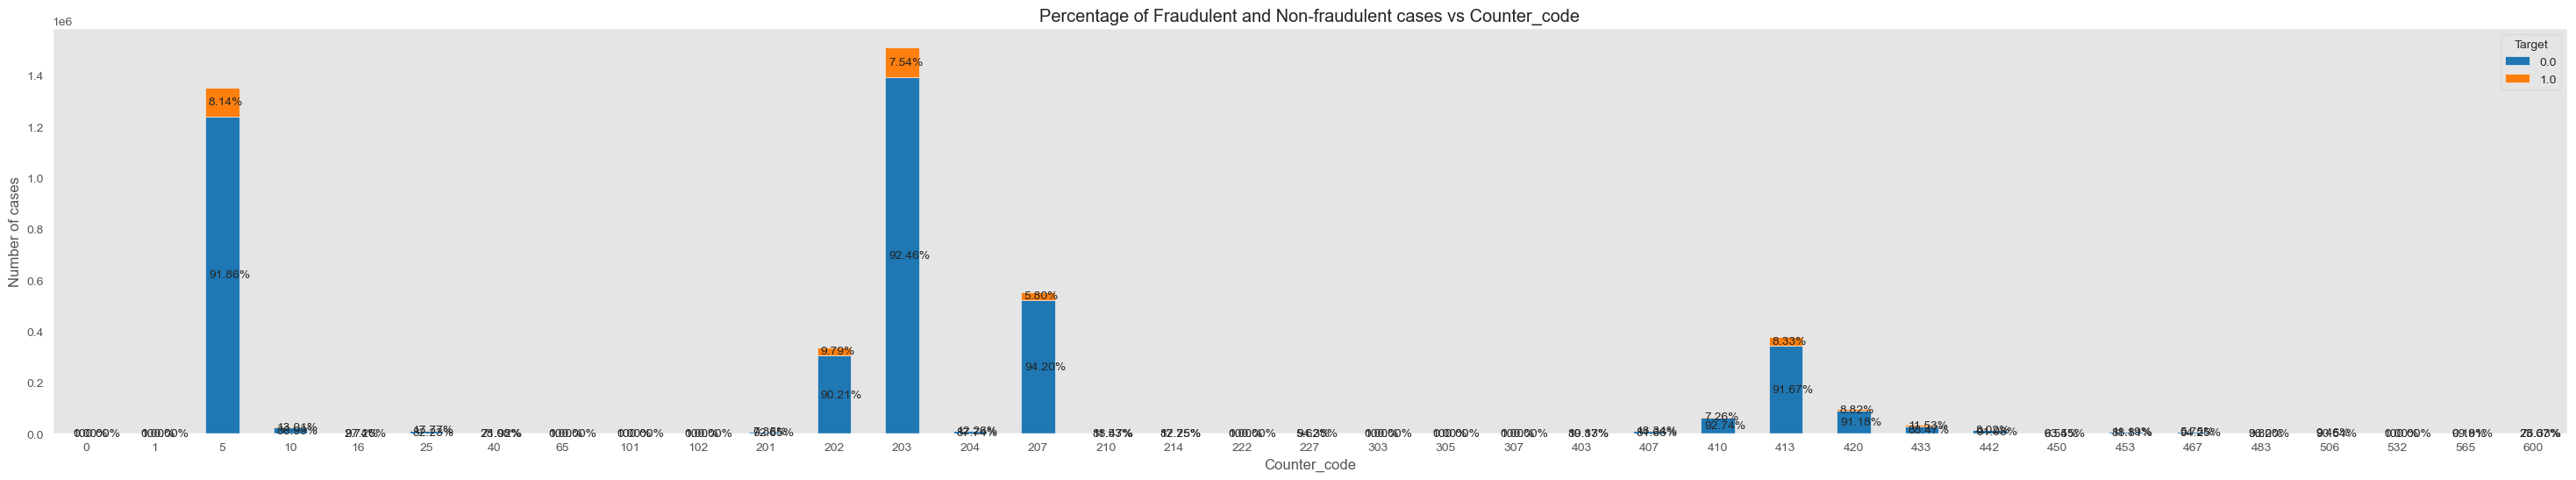

The highest rate of fraudulent is counter_code = 40 with rate 28.08%
The second highest rate of fraudulent is tarif_type = 600 with rate 23.67%
The third highest rate of fraudulent is tarif_type = 407 with rate 18.34%


In [71]:
edap.feature_target_distribution(df, 'counter_code', 'target')

#### **counter_type**

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target            0.0     1.0   ratio_0   ratio_1
counter_type                                     
ELEC          2823130  236348  0.922749  0.077251
GAZ           1278359  116764  0.916306  0.083694



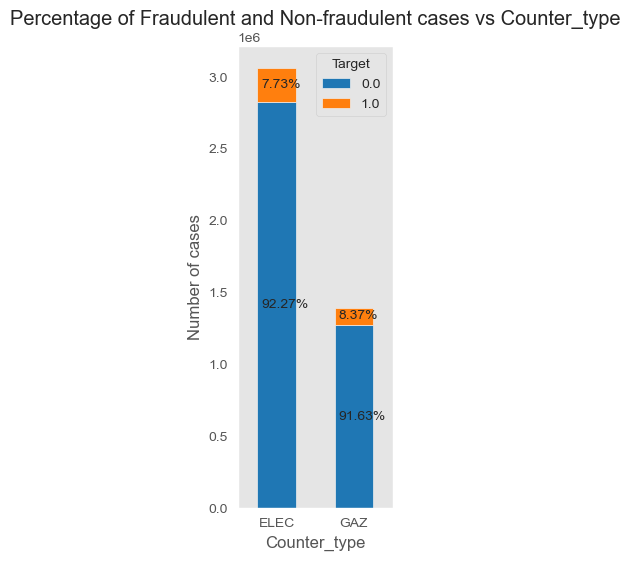

The highest rate of fraudulent is counter_type = GAZ with rate 8.37%
The second highest rate of fraudulent is tarif_type = ELEC with rate 7.73%


In [72]:
edap.feature_target_distribution(df, 'counter_type', 'target')

#### **target**

In [73]:
# calculate the statistical values of the number of invoices for each client
df[df['target']==1].groupby('client_id').size().describe()

# There are 7566 fraudulent clients.
# The average number of fraudulent cases for each client is 46.67
# The maximum number of cases for a fraudulent client is 272
# The minimum number of cases for a fraudulent client is 1

count    7566.000000
mean       46.670896
std        27.803271
min         1.000000
25%        29.000000
50%        41.000000
75%        64.000000
max       272.000000
dtype: float64

### **Final Data**

In [74]:
df.shape, df.columns

((4454601, 23),
 Index(['client_id', 'creation_date', 'district', 'region', 'client_catg',
        'target', 'invoice_date', 'tarif_type', 'counter_number',
        'counter_statue', 'counter_code', 'reading_remarque',
        'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
        'consommation_level_3', 'consommation_level_4', 'old_index',
        'new_index', 'months_number', 'counter_type', 'year', 'month'],
       dtype='object'))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454601 entries, 0 to 4476745
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   creation_date         datetime64[ns]
 2   district              int64         
 3   region                int64         
 4   client_catg           int64         
 5   target                float64       
 6   invoice_date          datetime64[ns]
 7   tarif_type            int64         
 8   counter_number        int64         
 9   counter_statue        object        
 10  counter_code          int64         
 11  reading_remarque      int64         
 12  counter_coefficient   int64         
 13  consommation_level_1  int64         
 14  consommation_level_2  int64         
 15  consommation_level_3  int64         
 16  consommation_level_4  int64         
 17  old_index             int64         
 18  new_index             int64         
 19  month

#### **New DataFrame**

In [76]:
# create a new dataframe after data preprocessing and cleaning
# df.to_csv('processed_data/df_01.csv', index=False)